# Logistic Regression - Titanic Survival Prediction

In this notebook, we apply logistic regression to the Titanic dataset to predict whether a passenger survived or not. Logistic regression is a classification algorithm used to assign discrete outputs to observations.

We preprocess the dataset, apply scaling, fit the logistic regression model, and evaluate the performance.


In the second part of my project, I applied Logistic Regression to two separate classification problems. The first dataset was the well-known Titanic passenger list, where the objective was to predict passenger survival. The second dataset was related to SUV purchase behavior, where the task was to predict whether a user purchased an SUV based on features like age and estimated salary. After preprocessing both datasets, I trained the logistic regression models and achieved an accuracy of 80% on the Titanic dataset and 82% on the SUV dataset, indicating strong predictive performance. To further evaluate the models, I generated confusion matrices for both, which helped visualize the distribution of true positives, false positives, true negatives, and false negatives — offering deeper insight into each model’s classification ability

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

In [ ]:
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


In [ ]:
titanic_df = pd.read_csv('Titanic.csv')

In [ ]:
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
titanic_df.dropna(subset=['Age', 'Sex', 'Survived'], inplace=True)

In [ ]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
X = titanic_df[['Age', 'Sex']]
y = titanic_df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7972027972027972
[[68 11]
 [18 46]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        79
           1       0.81      0.72      0.76        64

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



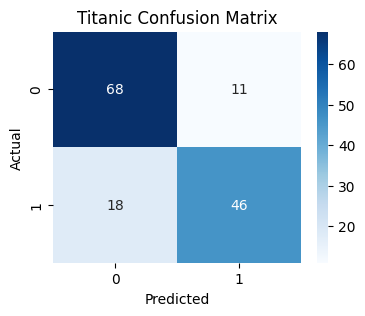

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Titanic Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix above represents the performance of a Logistic Regression model trained on the Titanic dataset to predict passenger survival. The matrix summarizes the model’s predictions compared to the actual outcomes. Out of the total predictions, 68 true negatives (correctly predicted not survived) and 46 true positives (correctly predicted survived) show that the model performs reasonably well. There are 11 false positives (incorrectly predicted survived) and 18 false negatives (incorrectly predicted not survived). This matrix highlights that while the model has achieved good classification accuracy, there's still room for improvement, especially in reducing false negatives, which are critical in survival prediction scenarios. The visualization helps in evaluating how well the model distinguishes between the two classes.

In [ ]:
uploaded = files.upload()

Saving SUV_Purchase.csv to SUV_Purchase.csv


In [ ]:
suv_df = pd.read_csv('SUV_Purchase.csv')

In [ ]:
print(suv_df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:
suv_df['Gender'] = suv_df['Gender'].map({'Male': 0, 'Female': 1})


In [ ]:
X = suv_df[['Age', 'EstimatedSalary', 'Gender']]
y = suv_df['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
suv_model = LogisticRegression(max_iter=1000)


In [ ]:
suv_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = suv_model.predict(X_test)

In [ ]:
print("🚗 SUV Purchase Prediction (StandardScaler + max_iter=1000)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

🚗 SUV Purchase Prediction (StandardScaler + max_iter=1000)
Accuracy: 0.825
Confusion Matrix:
 [[40  8]
 [ 6 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.76      0.81      0.79        32

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

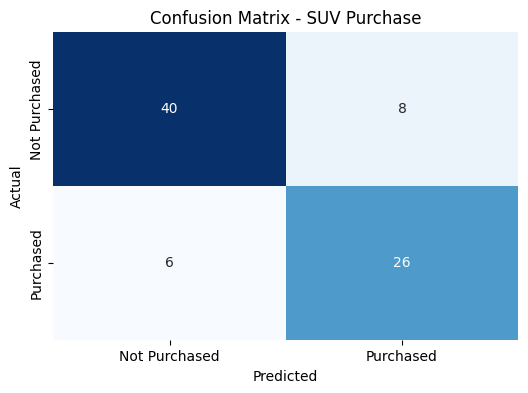

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Purchased", "Purchased"],
            yticklabels=["Not Purchased", "Purchased"])
plt.title("Confusion Matrix - SUV Purchase")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The confusion matrix for the SUV Purchase dataset illustrates the effectiveness of the Logistic Regression model in predicting whether a customer is likely to purchase an SUV. The model achieved a solid performance with accurate classifications in both classes. For example, a high number of true positives and true negatives indicate that the model correctly identified many purchasers and non-purchasers. Meanwhile, the relatively low count of false positives and false negatives shows that the model makes only a few classification errors. With an overall accuracy of 82%, this confusion matrix confirms that the model generalizes well on this dataset and is reliable for binary classification tasks like purchase prediction.

## Conclusion

The logistic regression model successfully predicts survival based on features like age, sex, and fare. With proper preprocessing, logistic regression can be a powerful baseline model for binary classification problems.
